In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("sats.csv", sep=";", header=0, index_col=1)

In [3]:
print(data.groupby("StationID").ObservationID.count().sort_values())

StationID
28      13
13      27
22      38
32      57
25      78
21     321
31     965
6     2291
24    2360
16    2439
2     9279
Name: ObservationID, dtype: int64


In [4]:
stationID=2
d = data.loc[stationID,['Azimuth','Elevation']]

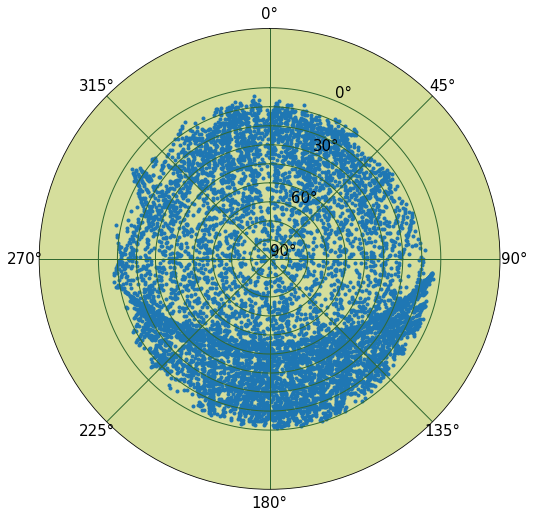

In [5]:
# Make a square figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, facecolor='#d5de9c')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)


ax.scatter(np.radians(d.Azimuth), 90-d.Elevation, marker='.')

# Customize ticks and labels
ax.set_yticks(range(0, 90+10, 10))
yLabel = ['90°', '', '', '60°', '', '', '30°', '', '', '0°']
ax.set_yticklabels(yLabel)
ax.axes.tick_params(labelsize=15)

ax.grid(color='#316931', linewidth=1, linestyle='-')

plt.show()

In [6]:
# Binning of the data
az_bins = np.linspace(0, 2*np.pi, 90)      # 0 to 2*pi in steps of 360/N.
el_bins = np.linspace(0, 90, 30)
theta, r = np.mgrid[0:2*np.pi:89j, 0:90:29j]
H, xedges, yedges = np.histogram2d(np.radians(d.Azimuth), 90-d.Elevation, bins=(az_bins,el_bins))

r.shape, theta.shape, H.shape

((89, 29), (89, 29), (89, 29))

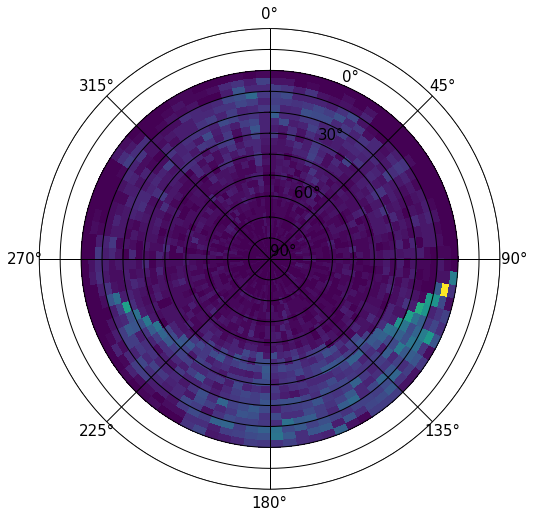

In [7]:
# Make a square figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ax.pcolormesh(theta, r, H)

# Customize ticks and labels
ax.set_yticks(range(0, 90+30, 10))
yLabel = ['90°', '', '', '60°', '', '', '30°', '', '', '0°']
ax.set_yticklabels(yLabel)
ax.axes.tick_params(labelsize=15)

ax.grid(color='#000000', linewidth=1, linestyle='-')

plt.show()

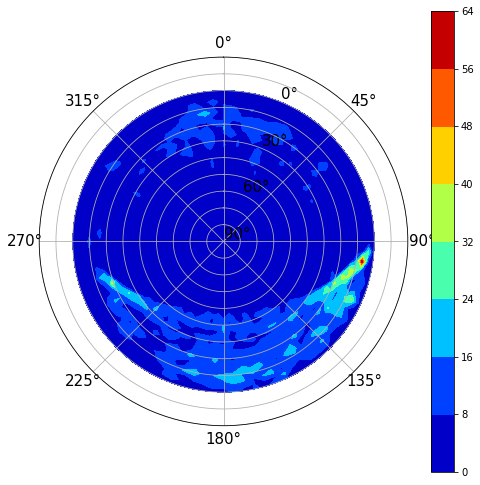

In [8]:
import matplotlib.cm as cm

# Make a square figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, facecolor='#FFFFFF')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ctf = ax.contourf(theta, r, H, cmap=cm.jet)
plt.colorbar(ctf)

# Customize ticks and labels
ax.set_yticks(range(0, 90+30, 10))
yLabel = ['90°', '', '', '60°', '', '', '30°', '', '', '0°']
ax.set_yticklabels(yLabel)
ax.axes.tick_params(labelsize=15)

plt.show()

/home/birke/c4/satnogs/az_el_plot/env3/lib/python3.4/site-packages/matplotlib/contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


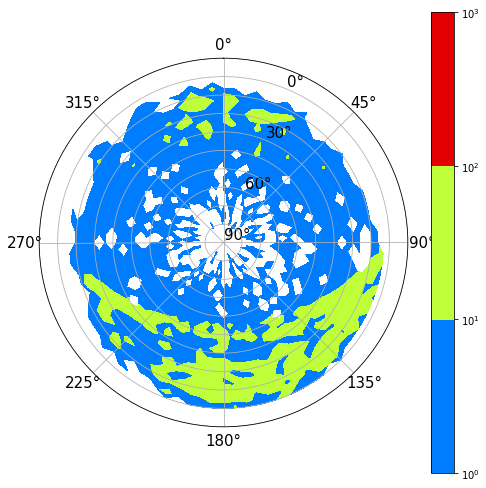

In [9]:
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

# Make a square figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, facecolor='#FFFFFF')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

ctf = ax.contourf(theta, r, H, levels=[1e0, 1e1, 1e2, 1e3],cmap=plt.cm.jet,norm = LogNorm()) #cmap=cm.jet)
plt.colorbar(ctf)

# Customize ticks and labels
ax.set_yticks(range(0, 90+20, 10))
yLabel = ['90°', '', '', '60°', '', '', '30°', '', '', '0°']
ax.set_yticklabels(yLabel)
ax.axes.tick_params(labelsize=15)

plt.show()